In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
import plotly.plotly as py
import plotly.graph_objs as go


In [27]:
it = pd.read_csv('ITUB.csv')

In [28]:
it.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,13.28,13.32,12.92,13.10,12.733912,15751200
1,2017-09-06,13.29,13.63,13.24,13.57,13.190776,16345600
2,2017-09-07,13.51,13.62,13.40,13.53,13.151893,13037400
3,2017-09-08,13.60,13.62,13.47,13.52,13.142174,16429000
4,2017-09-11,13.70,13.92,13.69,13.72,13.336583,8945700


In [29]:
it.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,13.28,13.32,12.92,13.10,12.733912,15751200
1,2017-09-06,13.29,13.63,13.24,13.57,13.190776,16345600
2,2017-09-07,13.51,13.62,13.40,13.53,13.151893,13037400
3,2017-09-08,13.60,13.62,13.47,13.52,13.142174,16429000
4,2017-09-11,13.70,13.92,13.69,13.72,13.336583,8945700


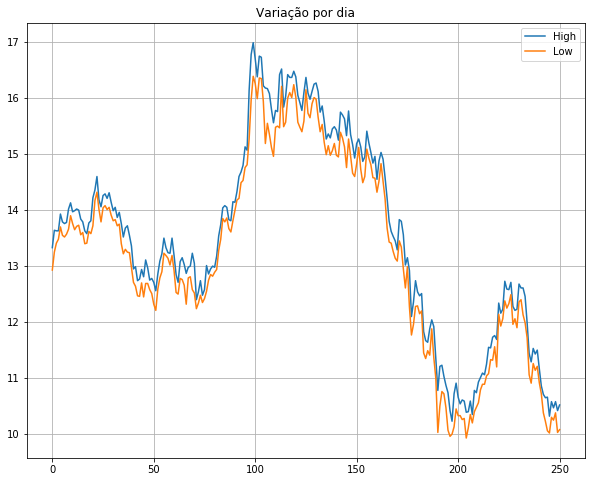

In [31]:
it[['High', 'Low']].plot(figsize=(10, 8), grid=True, title='Variação por dia')

In [32]:
it.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
x = it[['Open', 'High', 'Low', 'Volume']]

In [34]:
y = it[['Adj Close']]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [37]:
x_test.shape

(101, 4)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print(lm.intercept_)

[0.06591633]


In [42]:
predict = lm.predict(x_test)

Text(0,0.5,'Test')

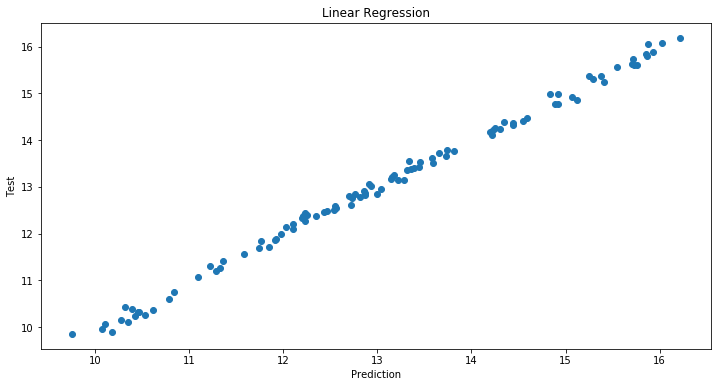

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predict)
plt.title('Linear Regression')
plt.xlabel('Prediction')
plt.ylabel('Test')

C:\Users\Gabriel Paladini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



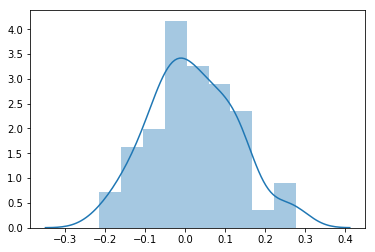

In [44]:
sns.distplot(y_test - predict)

In [45]:
from sklearn import metrics

In [46]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predict)))

RMSE:  0.10826762086972624


In [47]:
ml = pd.DataFrame(predict[:10])

In [48]:
ml

,0
0,14.166841
1,12.599023
2,13.513934
3,13.404156
4,12.613079
5,10.104045
6,9.902827
7,11.697577
8,10.743816
9,13.665219


In [49]:
Model = y_test[:10]

In [50]:
Model['Prediction'] = predict[:10]

C:\Users\Gabriel Paladini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [51]:
Model.columns = 'Fechamento real', '´Fechamento Predito'


In [69]:
Model['Erro'] = Model['Fechamento real'] - Model['Fechamento Predito']

C:\Users\Gabriel Paladini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [73]:
view = Model.drop('Prediction', axis=1)

In [75]:
view

,Fechamento real,Fechamento Predito,Erro
92,14.195827,14.166841,0.028986
68,12.552762,12.599023,-0.046261
30,13.593866,13.513934,0.079932
19,13.389668,13.404156,-0.014488
174,12.720860,12.613079,0.107781
247,10.350000,10.104045,0.245955
245,10.180000,9.902827,0.277173
187,11.743966,11.697577,0.046389
212,10.835756,10.743816,0.091940
85,13.726865,13.665219,0.061646
